# Data Preprocessing

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample dataset (replace this with a real healthcare dataset)
data = {
    'Age': [25, 45, 35, 50, 23, 40, 60, 33, 55, 43],
    'BloodPressure': [120, 130, 125, 140, 110, 135, 145, 128, 138, 132],
    'Cholesterol': [180, 220, 210, 240, 170, 230, 250, 200, 235, 225],
    'Lifestyle': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1],  # 0: Healthy, 1: Unhealthy
    'Risk': [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]  # 0: Low risk, 1: High risk
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Feature and target separation
X = df[['Age', 'BloodPressure', 'Cholesterol', 'Lifestyle']]
y = df['Risk']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# Model Selection and Training

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with parameters
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=42)

# Model Evaluation

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



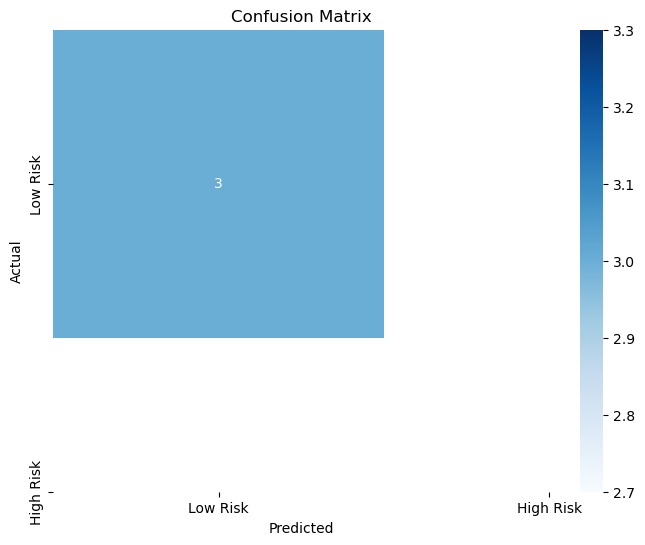

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Feature Importance Analysis

         Feature  Importance
1  BloodPressure    0.367347
0            Age    0.326531
2    Cholesterol    0.306122
3      Lifestyle    0.000000


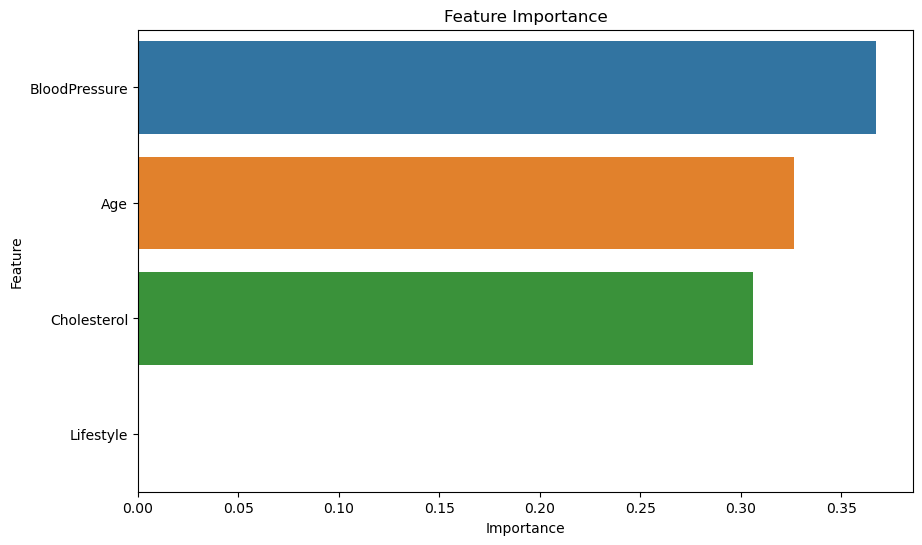

In [4]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


# Model Deployment (Optional)

In [11]:
from flask import Flask, request, jsonify
from threading import Thread
import traceback

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        features = [data['Age'], data['BloodPressure'], data['Cholesterol'], data['Lifestyle']]
        scaled_features = scaler.transform([features])
        prediction = model.predict(scaled_features)
        risk = 'High Risk' if prediction[0] == 1 else 'Low Risk'
        return jsonify({'prediction': risk})
    except Exception as e:
        return jsonify({'error': str(e)})

def run_flask():
    try:
        app.run(host='0.0.0.0', port=5000)
    except SystemExit as e:
        print("Server stopped:", e)
        traceback.print_exc()

# Run Flask app in a separate thread
thread = Thread(target=run_flask)
thread.start()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.19.202:5000
Press CTRL+C to quit
